In [1]:
import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools

from datetime import datetime
import squarify
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr

from scipy.signal import savgol_filter
from scipy.stats import rankdata,spearmanr 

import networkx as nx

np.set_printoptions(precision=3,suppress=True)
from datetime import datetime
from scipy.cluster import hierarchy

from sklearn.manifold import TSNE
from sklearn import feature_extraction
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

## Open the files

In [2]:
# clusters we care about
clusters = [13,48,6,49,104,57,85,80]
cluster_names = ['Democrats',"Republicans","Unorthodox","Public Health","Antivaxxers","French","Indian","FreedomUK"]

pre_dictionary = dict()
post_dictionary = dict()
full_dictionary = dict()
for i in range(len(clusters)):
    text_file = open(str(cluster_names[i]) + "_full" + ".txt", "r",encoding='utf8')
    content = text_file.read()
    full_dictionary[clusters[i]] = content
    text_file.close()
    
    text_file = open(str(cluster_names[i]) + "_pre" + ".txt", "r",encoding='utf8')
    content = text_file.read()
    pre_dictionary[clusters[i]]=content
    text_file.close()
    
    text_file = open(str(cluster_names[i]) + "_post" + ".txt", "r",encoding='utf8')
    content = text_file.read()
    post_dictionary[clusters[i]]=content
    text_file.close()

In [3]:
# clusters we care about
clusters = [13,48,6,49,104] #,57,85,80]
cluster_names = ['Democrats',"Republicans","Unorthodox","Public Health","Antivaxxers"] #"French","Indian","FreedomUK"]

corpus = [] 
is_pre = [] 
cluster = [] 

for i in range(len(clusters)):

    
    text_file = open(str(cluster_names[i]) + "_pre" + ".txt", "r",encoding='utf8')
    content = text_file.read()
    corpus.append(content)
    is_pre.append(True)
    cluster.append(clusters[i])
    text_file.close()
    
    text_file = open(str(cluster_names[i]) + "_post" + ".txt", "r",encoding='utf8')
    content = text_file.read()
    corpus.append(content)
    is_pre.append(False)
    cluster.append(clusters[i])
    text_file.close()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.5,lowercase=True)

# Corpus is a collection of documents, documents are strings
# So the corpus should be of shape: [doc1,doc2,doc2]
# in this case corpus = [com1_pre,com1_post,....,comn_pre,comn_post]
tfidf = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
print(tfidf.shape)

(10, 32349)


In [5]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [6]:
is_pre = np.array(is_pre)
cluster = np.array(cluster)

In [7]:
preindices = np.where(is_pre==True)
postindices = np.where(is_pre==False)
tfidf[preindices].shape

(5, 32349)

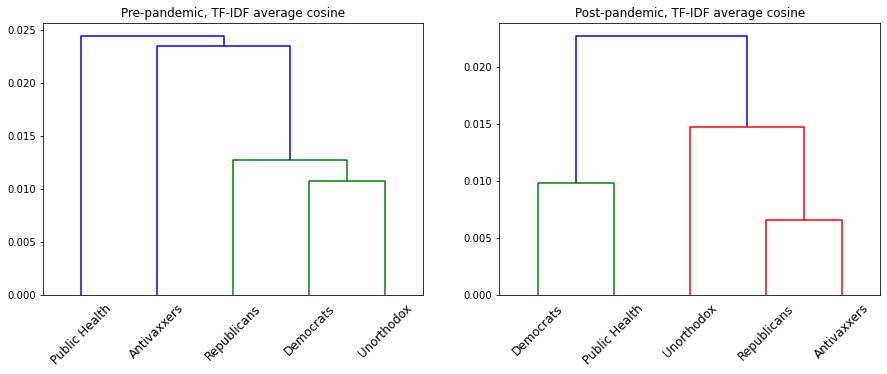

In [8]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)

# hierarchy linkage does the dendrogramic work
Z = hierarchy.linkage(tfidf[preindices].toarray(),'average',metric='cosine')
#plt.figure()
dn = hierarchy.dendrogram(Z,labels=cluster_names,color_threshold=0.02,leaf_rotation=45)
ax.set_title('Pre-pandemic, TF-IDF average cosine')
#plt.show()

ax = fig.add_subplot(122)
Z = hierarchy.linkage(tfidf[postindices].toarray(),'average',metric='cosine')
#plt.figure()
dn = hierarchy.dendrogram(Z,labels=cluster_names,color_threshold=0.02,leaf_rotation=45)
ax.set_title('Post-pandemic, TF-IDF average cosine')
plt.show()


### LIWC for Dendogram

In [9]:
df = pd.read_csv('LIWC for dendrogram.csv')

In [10]:
liwc_values = np.array(np.array(df)[:,1:],dtype=float)

In [11]:
groupnames = list(df['docname'])
pregroups = list(range(0,10,2))
pregroupnames = [groupnames[x] for x in range(0,10,2)]
postgroups = list(range(1,10,2))
postgroupnames = [groupnames[x] for x in range(1,10,2)]
print(pregroupnames)
print(postgroupnames)

['Republicans_pre', 'Unorthodox_pre', 'PublicHealth_pre', 'Democrats_pre', 'Antivaxxers_pre']
['Republicans_post', 'Unorthodox_post', 'PublicHealth_post', 'Democrats_post', 'Antivaxxers_post']


In [12]:
liwc_values[pregroups]

array([[0.722, 0.561, 0.131, 0.092, 0.501, 0.015, 0.487, 0.08 , 0.395,
        0.756, 0.172, 0.144, 0.073, 0.041, 0.012, 0.005, 0.049],
       [0.98 , 0.414, 0.093, 0.081, 0.422, 0.006, 0.35 , 0.056, 0.39 ,
        0.926, 0.261, 0.123, 0.047, 0.047, 0.016, 0.009, 0.017],
       [1.587, 0.44 , 0.1  , 0.079, 0.491, 0.004, 0.533, 0.028, 0.232,
        0.727, 0.334, 0.24 , 0.047, 0.072, 0.014, 0.015, 0.006],
       [0.976, 0.439, 0.09 , 0.132, 0.442, 0.01 , 0.459, 0.051, 0.301,
        0.883, 0.143, 0.138, 0.057, 0.044, 0.015, 0.013, 0.01 ],
       [1.345, 0.919, 0.284, 0.167, 0.485, 0.009, 0.561, 0.059, 0.527,
        0.595, 0.507, 0.076, 0.062, 0.054, 0.03 , 0.01 , 0.016]])

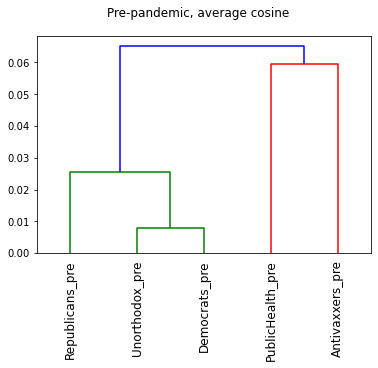

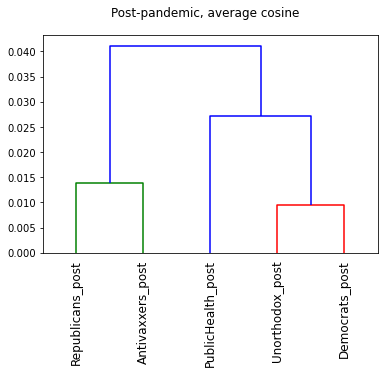

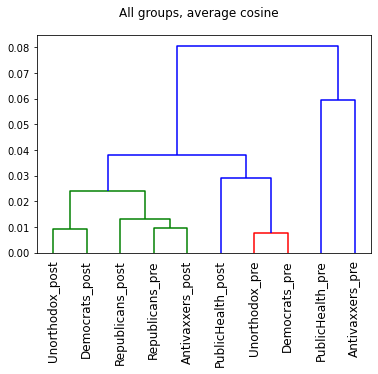

In [13]:
Z = hierarchy.linkage(liwc_values[pregroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
plt.suptitle('Pre-pandemic, average cosine')
plt.show()

Z = hierarchy.linkage(liwc_values[postgroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
plt.suptitle('Post-pandemic, average cosine')
plt.show()

Z = hierarchy.linkage(liwc_values,'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.025,leaf_rotation=90)
plt.suptitle('All groups, average cosine')
plt.show()

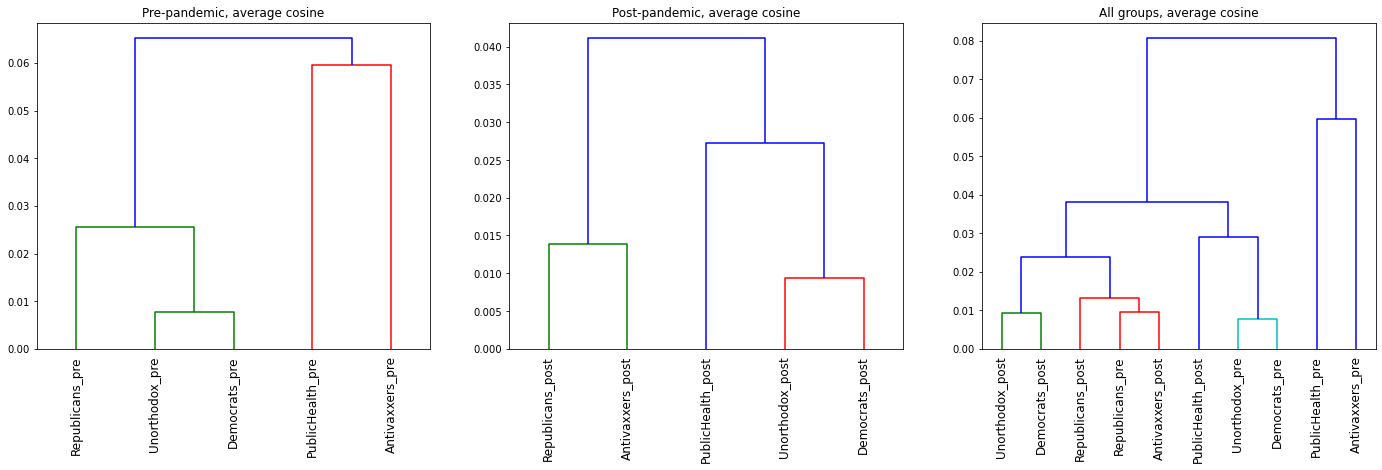

In [14]:
fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(liwc_values[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
ax.set_title('Pre-pandemic, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(liwc_values[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(liwc_values,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('All groups, average cosine')

plt.show()



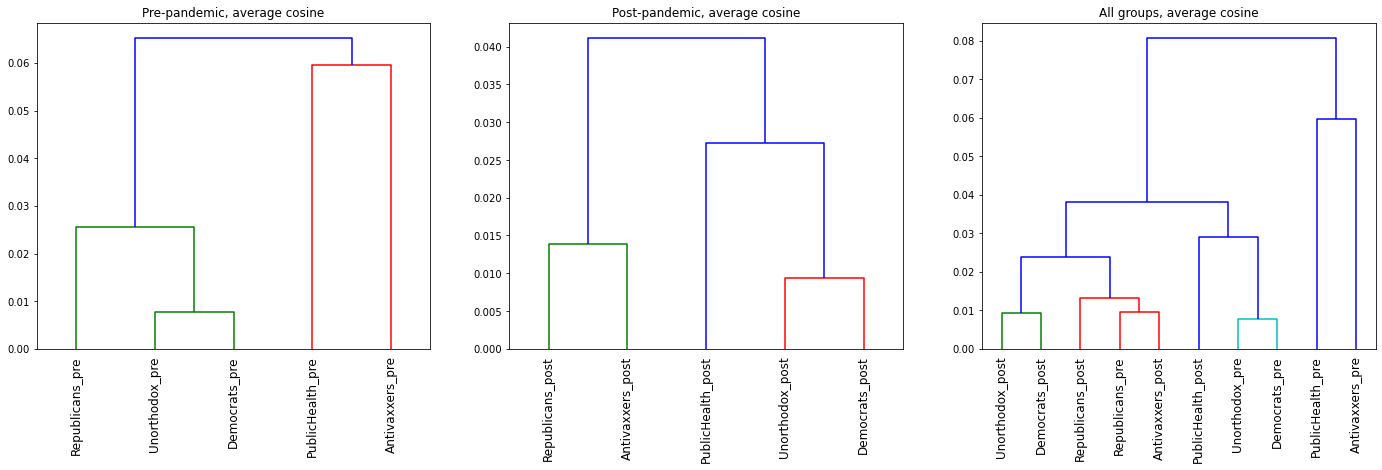

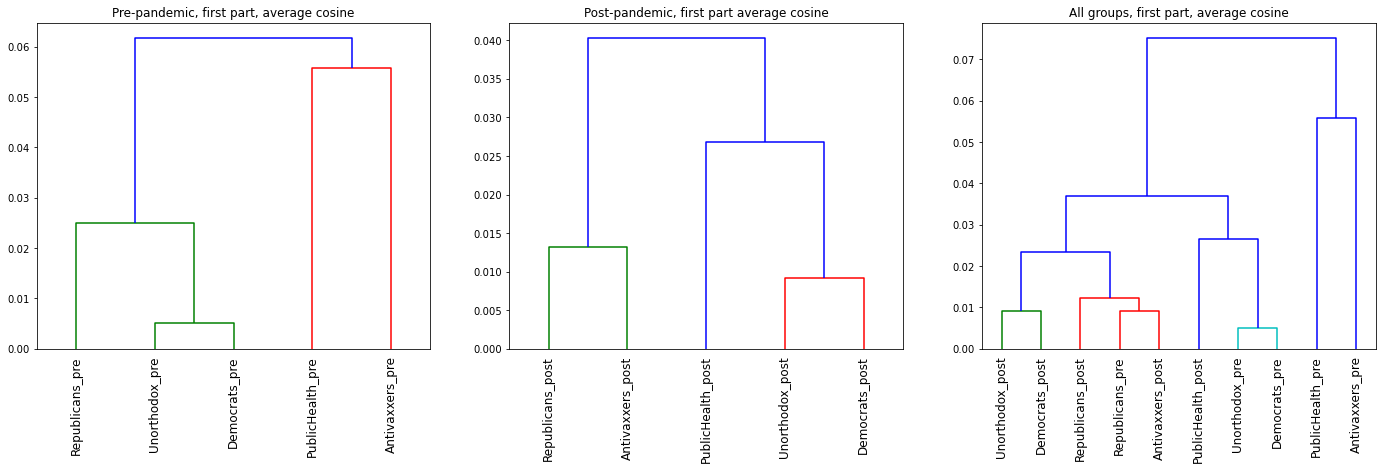

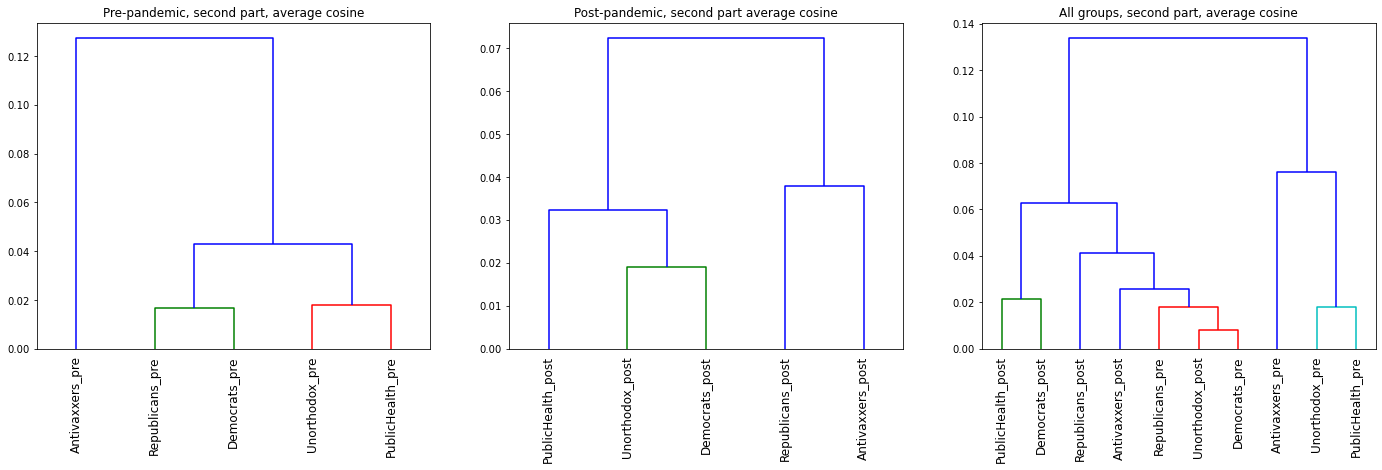

In [15]:
firsthalf = liwc_values[:,:-7]
secondhalf = liwc_values[:,-7:]


fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(liwc_values[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
ax.set_title('Pre-pandemic, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(liwc_values[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(liwc_values,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('All groups, average cosine')

plt.show()



fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(firsthalf[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
ax.set_title('Pre-pandemic, first part, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(firsthalf[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, first part average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(firsthalf,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('All groups, first part, average cosine')

plt.show()



fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(secondhalf[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.03,leaf_rotation=90)
ax.set_title('Pre-pandemic, second part, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(secondhalf[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.025,leaf_rotation=90)
ax.set_title('Post-pandemic, second part average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(secondhalf,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.025,leaf_rotation=90)
ax.set_title('All groups, second part, average cosine')

plt.show()


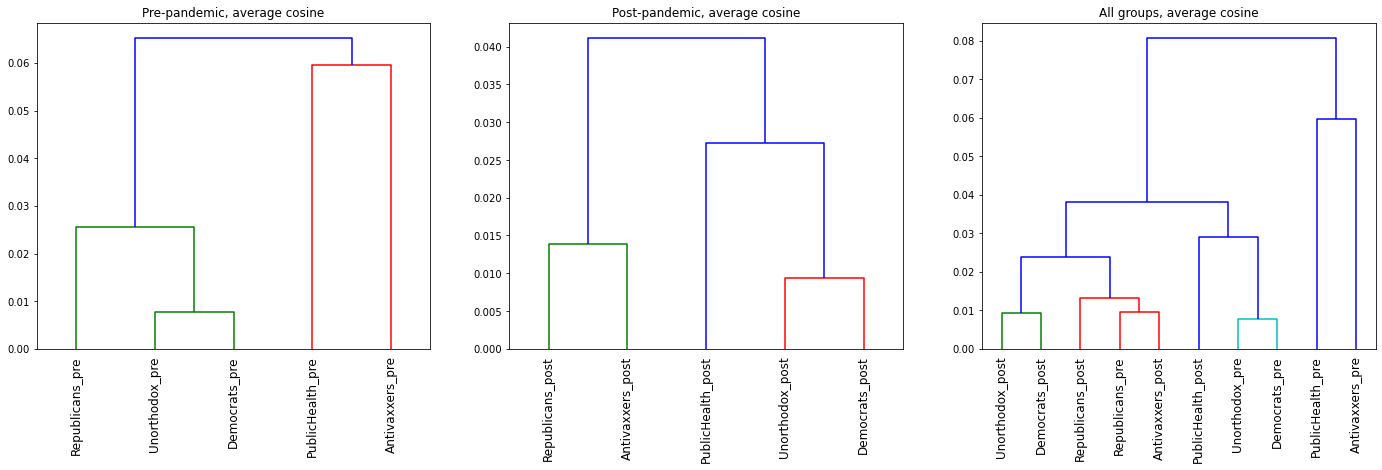

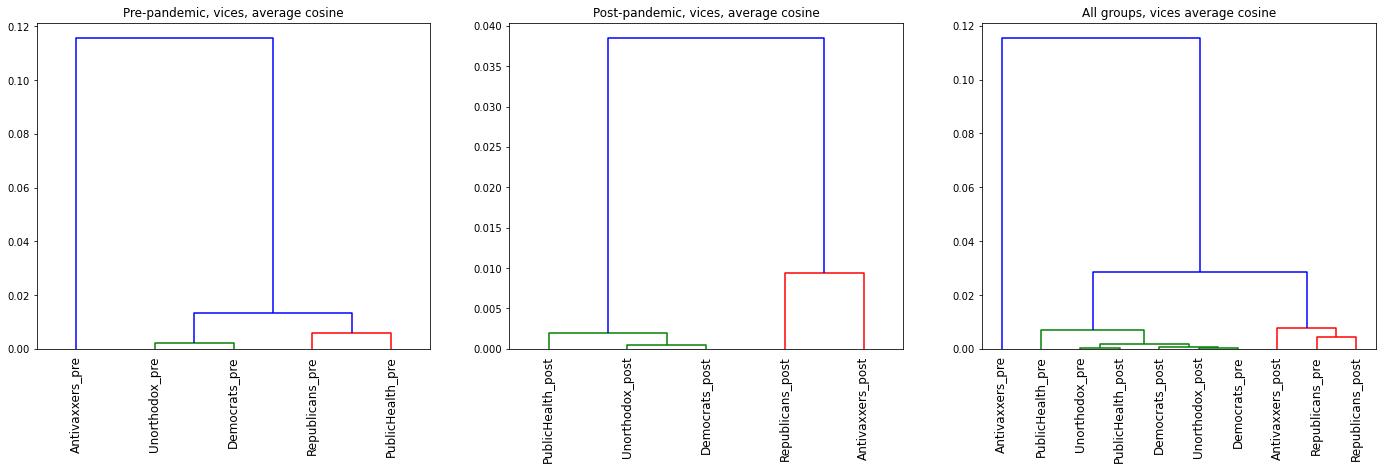

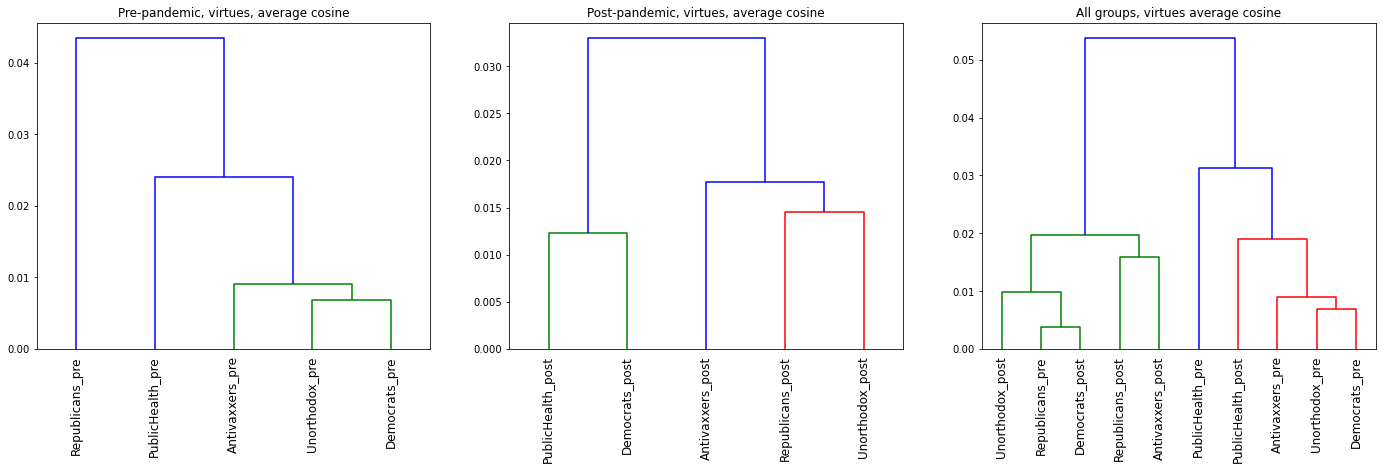

In [16]:
fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(liwc_values[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
ax.set_title('Pre-pandemic, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(liwc_values[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(liwc_values,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('All groups, average cosine')

plt.show()




vices = [x for x in list(df.columns) if x.find('vice')>-1]
touse = np.array(df[vices],dtype=float)

fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(touse[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.01,leaf_rotation=90)
ax.set_title('Pre-pandemic, vices, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(touse[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, vices, average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(touse,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.025,leaf_rotation=90)
ax.set_title('All groups, vices average cosine')

plt.show()



virtues = [x for x in list(df.columns) if x.find('virtue')>-1]
touse = np.array(df[virtues],dtype=float)

fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(131)
Z = hierarchy.linkage(touse[pregroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.01,leaf_rotation=90)
ax.set_title('Pre-pandemic, virtues, average cosine')

ax = fig.add_subplot(132)
Z = hierarchy.linkage(touse[postgroups],'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.015,leaf_rotation=90)
ax.set_title('Post-pandemic, virtues, average cosine')

ax = fig.add_subplot(133)
Z = hierarchy.linkage(touse,'average',metric='cosine')
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.025,leaf_rotation=90)
ax.set_title('All groups, virtues average cosine')

plt.show()

In [17]:
tsne = TSNE().fit(liwc_values)

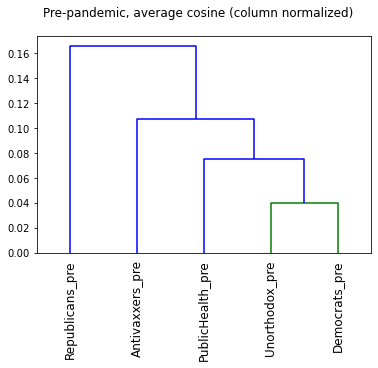

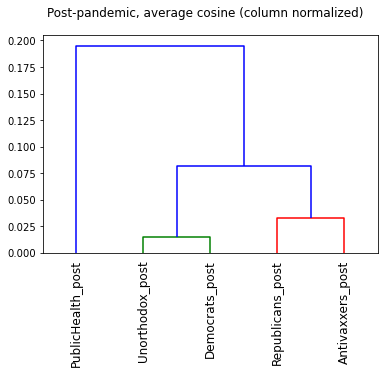

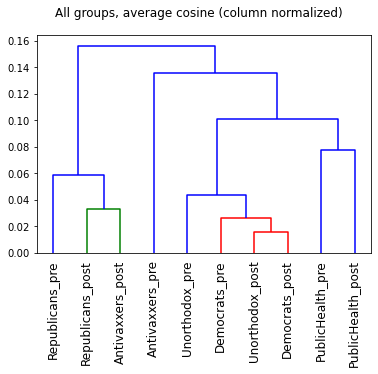

In [18]:
column_normalized_LIWC = liwc_values / np.sum(liwc_values,axis=0).reshape(1,-1)
sublabel = ' (column normalized)'
touse = column_normalized_LIWC

Z = hierarchy.linkage(touse[pregroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
plt.suptitle('Pre-pandemic, average cosine'+sublabel)
plt.show()

Z = hierarchy.linkage(touse[postgroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.035,leaf_rotation=90)
plt.suptitle('Post-pandemic, average cosine'+sublabel)
plt.show()

Z = hierarchy.linkage(touse,'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.04,leaf_rotation=90)
plt.suptitle('All groups, average cosine'+sublabel)
plt.show()



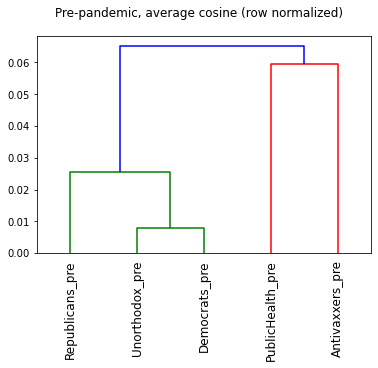

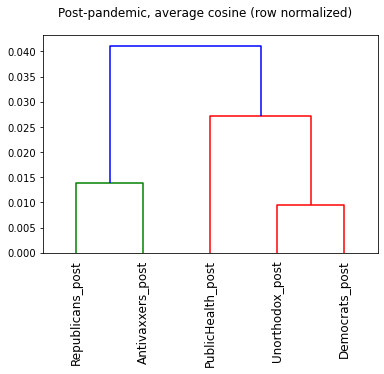

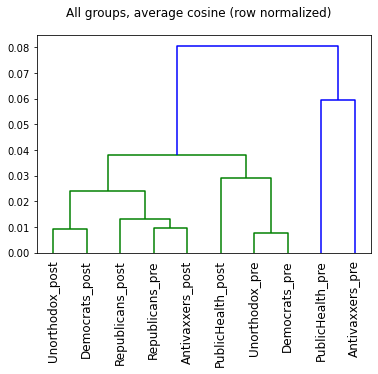

In [19]:
row_normalized_LIWC = liwc_values / np.sum(liwc_values,axis=1).reshape(-1,1)
sublabel = ' (row normalized)'
touse = row_normalized_LIWC

Z = hierarchy.linkage(touse[pregroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=pregroupnames,color_threshold=0.06,leaf_rotation=90)
plt.suptitle('Pre-pandemic, average cosine'+sublabel)
plt.show()

Z = hierarchy.linkage(touse[postgroups],'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=postgroupnames,color_threshold=0.035,leaf_rotation=90)
plt.suptitle('Post-pandemic, average cosine'+sublabel)
plt.show()

Z = hierarchy.linkage(touse,'average',metric='cosine')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=groupnames,color_threshold=0.04,leaf_rotation=90)
plt.suptitle('All groups, average cosine'+sublabel)
plt.show()